# Validation Summary Tests

## Overall Performance Metrics

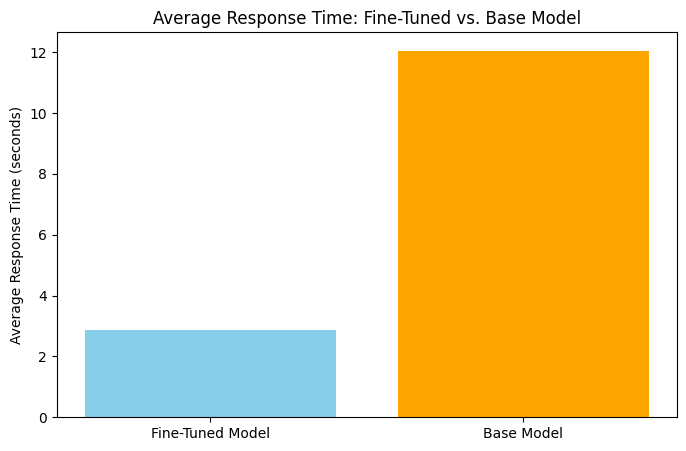

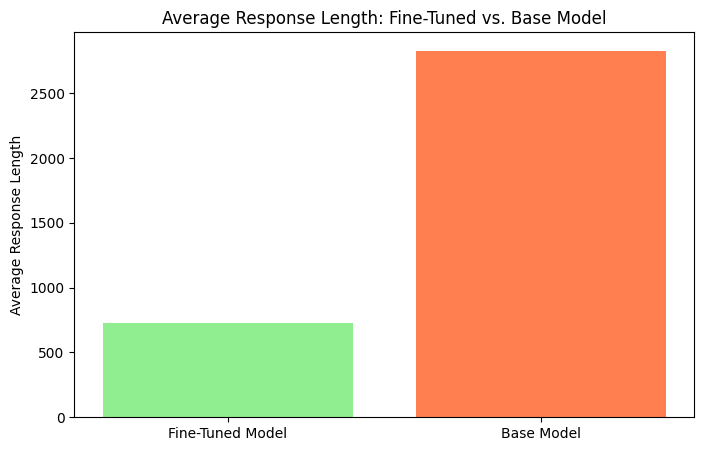

Time Improvement: 76.24%
Conciseness Improvement: 74.37%


In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON data
with open("../data/final/detailed_analysis_20241216_142035.json", "r") as f:
    data = json.load(f)

overall_performance = data["overall_performance"]

# Extract metrics
avg_ft_time = overall_performance["avg_ft_time"]
avg_base_time = overall_performance["avg_base_time"]
time_improvement = overall_performance["time_improvement"]
avg_ft_length = overall_performance["avg_ft_length"]
avg_base_length = overall_performance["avg_base_length"]
conciseness_improvement = overall_performance["conciseness_improvement"]

# Create a bar chart for response times
labels = ['Fine-Tuned Model', 'Base Model']
times = [avg_ft_time, avg_base_time]

plt.figure(figsize=(8, 5))
plt.bar(labels, times, color=['skyblue', 'orange'])
plt.ylabel('Average Response Time (seconds)')
plt.title('Average Response Time: Fine-Tuned vs. Base Model')
plt.show()

# Create a bar chart for response lengths
lengths = [avg_ft_length, avg_base_length]

plt.figure(figsize=(8, 5))
plt.bar(labels, lengths, color=['lightgreen', 'coral'])
plt.ylabel('Average Response Length')
plt.title('Average Response Length: Fine-Tuned vs. Base Model')
plt.show()

# Display percentage improvements
print(f"Time Improvement: {time_improvement:.2f}%")
print(f"Conciseness Improvement: {conciseness_improvement:.2f}%")

## Category Performance Metrics

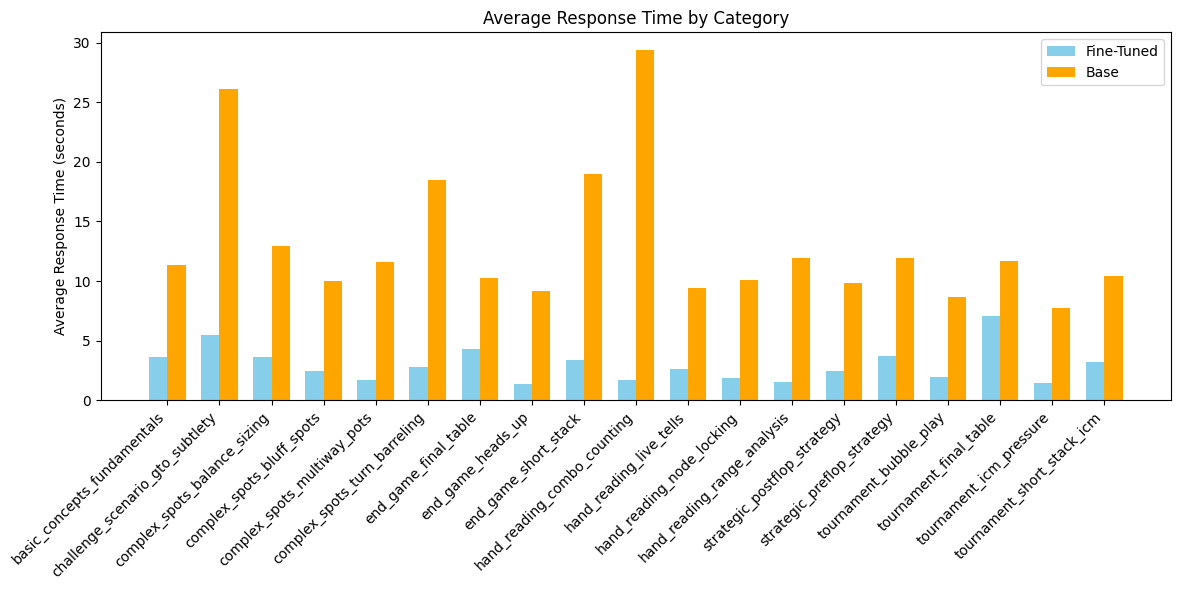

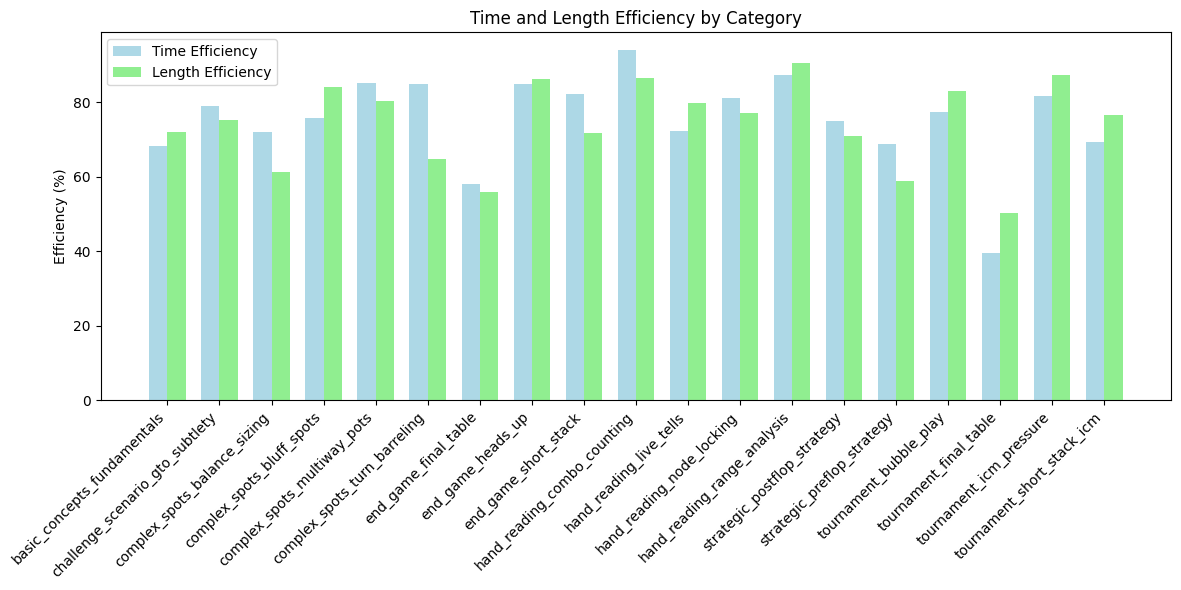

In [2]:
category_stats = data["category_stats"]

# Prepare data for plotting
categories = list(category_stats.keys())
ft_times = [category_stats[c]["ft_response_time"]["mean"] for c in categories]
base_times = [category_stats[c]["base_response_time"]["mean"] for c in categories]
time_efficiencies = [category_stats[c]["time_efficiency"] for c in categories]
length_efficiencies = [category_stats[c]["length_efficiency"] for c in categories]

# Create a grouped bar chart for response times by category
x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, ft_times, width, label='Fine-Tuned', color='skyblue')
rects2 = ax.bar(x + width/2, base_times, width, label='Base', color='orange')

ax.set_ylabel('Average Response Time (seconds)')
ax.set_title('Average Response Time by Category')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

fig.tight_layout()
plt.show()

# Create a bar chart for time and length efficiencies
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, time_efficiencies, width, label='Time Efficiency', color='lightblue')
rects2 = ax.bar(x + width/2, length_efficiencies, width, label='Length Efficiency', color='lightgreen')

ax.set_ylabel('Efficiency (%)')
ax.set_title('Time and Length Efficiency by Category')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

fig.tight_layout()
plt.show()

## Term Density

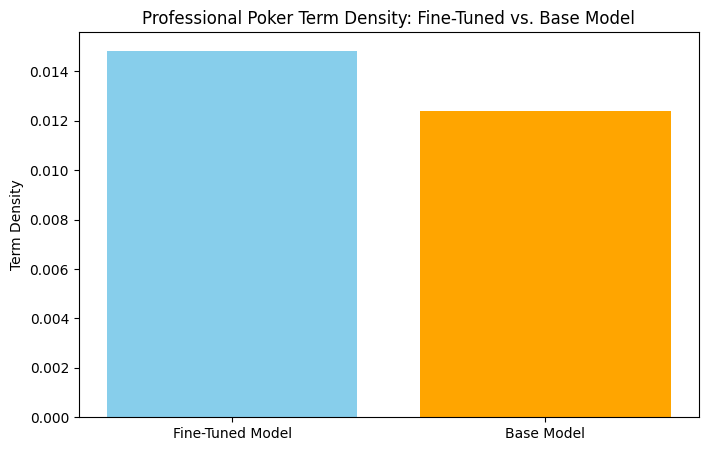

Term Density Difference (FT - Base): 0.0024
Percentage Difference: 19.54%


In [5]:
term_stats = data["term_stats"]

ft_term_density = term_stats["ft_term_density"]
base_term_density = term_stats["base_term_density"]

# Create a bar chart for term density
labels = ['Fine-Tuned Model', 'Base Model']
densities = [ft_term_density, base_term_density]

plt.figure(figsize=(8, 5))
plt.bar(labels, densities, color=['skyblue', 'orange'])
plt.ylabel('Term Density')
plt.title('Professional Poker Term Density: Fine-Tuned vs. Base Model')
plt.show()

# Calculate the difference in term density
term_density_diff = ft_term_density - base_term_density
print(f"Term Density Difference (FT - Base): {term_density_diff:.4f}")

# Calculate and display the percentage difference
percent_diff = ((ft_term_density - base_term_density) / base_term_density) * 100
print(f"Percentage Difference: {percent_diff:.2f}%")

## Output for Comparison

In [36]:
from IPython.display import display, HTML, Markdown

detailed_responses = data["detailed_responses"]

# CSS styling for the table
table_style = """
<style>
    table { width: 100%; border-collapse: collapse; margin: 20px 0; }
    th, td { padding: 12px; text-align: left; border: 1px solid #ddd; }
    th { background-color: #f5f5f5; }
    tr:nth-child(even) { background-color: #f9f9f9; }
    h3 { color: #2c3e50; margin-top: 30px; }
    .query { color: #34495e; margin: 15px 0; font-style: italic; }
</style>
"""

display(HTML(table_style))

# Select a few examples (e.g., the first 3)
for i in range(1,30,10):
    response = detailed_responses[i]
    category = response["category"]
    query = response["query"]
    ft_response = response["fine_tuned_response"]
    base_response = response["base_response"]

    # Display formatted content
    display(Markdown(f"### Category: {category}"))
    display(HTML(f'<p class="query"><b>Query:</b> {query}</p>'))
    
    # Create comparison table
    table_html = f"""
    <table>
        <tr>
            <th>Fine-Tuned Response</th>
            <th>Base Response</th>
        </tr>
        <tr>
            <td>{ft_response}</td>
            <td>{base_response}</td>
        </tr>
    </table>
    """
    display(HTML(table_html))

### Category: basic_concepts_fundamentals

Fine-Tuned Response,Base Response
"Pot odds and implied odds work together by first giving you a current mathematical evaluation (pot odds) and then allowing you to consider future potential (implied odds). For example, if you have a flush draw after the flop, pot odds might justify a call, but implied odds could encourage chasing if you expect to win big on later streets. Balancing both helps optimize long-term profitability.","When deciding whether to chase a draw in poker, understanding both pot odds and implied odds is crucial. Here’s how they work together: ### Pot Odds Pot odds are a mathematical calculation that helps you determine whether a call is profitable based on the current size of the pot and the cost of your bet. To calculate pot odds, use the following formula: **Pot Odds = (Current Pot Size) / (Cost to Call)** For instance, if there’s $100 in the pot and your opponent bets $50, the pot size is now $150 (because you have to add the bet to the pot), and it will cost you $50 to call. Your pot odds would be: - Pot Odds = $150 / $50 = 3:1 This means that for every $1 you invest, you could win $3. ### Implied Odds Implied odds take pot odds a step further by considering not just the current pot size but also the potential future bets you can win if you complete your draw. This is particularly relevant for draws that are likely to improve your hand significantly, leading your opponent to bet more on future streets. To calculate implied odds, you essentially add your expectations of future bets to the current pot size. For example, if you believe that if you hit your draw, you could win an additional $100 from your opponent on future bets, you would add that to the current pot size when considering whether to chase your draw. ### Putting Them Together When deciding to chase a draw, you need to consider both pot odds and implied odds: 1. **Calculate Pot Odds:** Determine whether the immediate pot odds justify a call. Compare the odds of completing your draw to the pot odds. For example, if you have a straight draw with 8 outs, you have roughly a 31.5% chance of hitting your draw on the next card (2.2 to 1 against). If your pot odds are better than 2.2 to 1, it’s a good call based on pot odds alone. 2. **Consider Implied Odds:** If your pot odds are not favorable, think about the potential for implied odds. If you believe that hitting your draw will lead to additional bets from your opponent, you need to factor those potential winnings into your decision. If you can realistically expect to win more than the current pot size if you complete your draw, it may justify calling even if the pot odds alone do not. ### Example Scenario Imagine you have a flush draw with a pot of $80 and your opponent bets $20. The pot is now $100, and it costs you $20 to call. Your pot odds are 5:1 (100/20). If you believe that hitting your flush will lead your opponent to bet another $80, your implied odds would suggest that you’re actually looking at an effective pot of $180 (the current pot plus potential future bets), which would change your pot odds to 9:1 (180/20). ### Conclusion In summary, use pot odds to determine the profitability of the immediate call but enhance your decision-making with implied odds by evaluating the likelihood of future bets if you hit your draw. Together, they provide a comprehensive framework for making informed decisions about chasing draws in poker."


### Category: strategic_postflop_strategy

Fine-Tuned Response,Base Response
"On a T-high rainbow flop with JJ, the choice between a turn double-barrel and pot control is nuanced. GTO solutions suggest:\n\n1. **Turn Double-Barrel**: If the turn is a low card that doesn't complete any draws, firing a second barrel maintains pressure on hands like TT, AQ, or weaker pairs. It capitalizes on fold equity and builds the pot with a strong overpair.\n\n2. **Pot Control**: If the turn is a J or completes a possible straight (e.g., with a 9), controlling the pot becomes crucial. Checking back can induce bluffs from weaker hands and keep the pot manageable against potential sets or completed straights.\n\nBalancing these lines involves mixed strategies where certain turns favor aggression while others necessitate caution. Regularly adapting based on opponent tendencies and perceived range enhances profitability.","In a situation where you 4-bet preflop with pocket Jacks (JJ) and face a T-high rainbow flop (e.g., 10-7-2), you have a few strategic considerations for the turn, especially after your continuation bet (c-bet) was called by your opponent. **1. Turn Double-Barrels vs. Pot Control:** - **Double-Barrel Strategy:** In a GTO context, double-barreling can be a strong play with your JJ, especially if your opponent's calling range on the flop includes hands that can continue facing a second barrel (like overpairs, some broadway cards, and gutshots). The goal is to apply pressure and potentially force folds from hands that have not improved. When considering a turn card, if it’s a card that could complete draws (like a 9, or another T), you may want to continue applying pressure with your JJ to protect your equity and potentially extract value from worse hands. - **Pot Control Strategy:** Alternatively, you might decide to take a pot control line, especially if the turn card is not favorable (e.g., if it brings a scare card for your opponent, such as a J, Q, K, or another T). In this case, checking back can allow you to realize your equity without inflating the pot with a vulnerable hand. This also allows you to potentially see a river for free, where you could evaluate whether to bet for value or check again. **2. Balancing the Lines:** - **Balanced Approach:** A GTO approach would advocate for a mix of both strategies. You would want to double-barrel with some of your strong hands (like overpairs and strong draws) while also mixing in some bluffs and mid-strength hands to keep your opponent's range wide and uncertain. For instance, you could double-barrel with JJ in some situations while also holding back with some hands that have less equity or are more vulnerable. This creates a balanced strategy where your opponent cannot easily exploit your betting patterns. **3. Consideration of Opponent's Range:** - The decision to double-barrel or control the pot heavily depends on your read of the opponent’s tendencies. If they are known to be sticky and call down with a wide range, you might lean more towards pot control on the turn. Conversely, if they tend to fold to aggression, a double-barrel could be more effective. **Summary:** In summary, a GTO approach would advocate for a balanced strategy that includes both double-barreling and pot control lines. The decision should be influenced by the turn card, your opponent's tendencies, and the overall dynamics of the hand. The main goal is to maximize value while minimizing the risk of getting your stack compromised with a vulnerable hand."


### Category: tournament_bubble_play

Fine-Tuned Response,Base Response
"3 off the money in a MTT with 99 UTG and multiple short stacks behind requires cautious play. GTO-based ICM calculations show that busting out 3 spots from the money has a high negative EV due to the significant prize jumps. Opening 99 UTG increases the risk of elimination without a reward commensurate to the risk, especially if short stacks go all-in behind. Therefore, folding 99 UTG is the optimal GTO-based decision to preserve your tournament life and equity.","In a multi-table tournament (MTT) situation where you are 3 off the money (ITM) and holding pocket nines (99) in early position (UTG), the decision to open or fold is heavily influenced by both Game Theory Optimal (GTO) strategy and Independent Chip Model (ICM) considerations. ### Key Factors to Consider: 1. **ICM Pressure**: As you are close to the money bubble, the value of your chips is significantly higher. Each chip you lose has a greater impact on your expected payout than each chip you gain. This means that the risk of busting out before the money is more pronounced, especially with multiple short stacks behind you. 2. **Stack Sizes**: You need to evaluate the stack sizes of the players behind you. If you have several short stacks that are likely to go all-in or shove, this could complicate your decision. If a short stack goes all-in and you call with 99, you might be risking your tournament life if you're not careful. 3. **GTO Strategy**: From a GTO perspective, you want to have a balanced opening range from early position. Pocket nines are a strong hand, but they are not invulnerable, especially with the risk of being in a multi-way pot. 4. **Position and Range**: Opening from UTG means you are first to act, and you will be out of position for the remainder of the hand. This positional disadvantage can make it more challenging to navigate post-flop play, particularly if you face aggression from players behind you. 5. **Table Dynamics**: Assess the tendencies of the players at the table. If they are tight and likely to fold to aggression, then opening with 99 could be more favorable. Conversely, if they are aggressive and likely to shove with a wide range, the risk of a large confrontation increases. ### Conclusion: - **Open Decision**: Given the ICM pressure, the presence of short stacks, and the position, a conservative approach may be warranted. If the players behind you are likely to shove frequently, it might be prudent to fold 99. However, if the table dynamics suggest that they will fold more often than not, or if you can isolate a shorter stack, an open raise could be justified. - **GTO Implementation**: If you opt to open, consider your sizing carefully. A smaller open may allow you to fold to aggressive actions from the players behind you while still maintaining a presence in the hand. Ultimately, the decision hinges on your read of the table and your assessment of the risk versus reward, factoring in ICM implications. If the risk of losing your stack outweighs the potential reward of accumulating more chips, it may be best to fold."


## MMLU Adaptation

In [13]:
import json
import os
from openai import OpenAI
from typing import List, Dict, Any
import pandas as pd
from datetime import datetime

In [15]:
# Initialize OpenAI client
try:
    # First try to get API key from environment variable
    api_key = os.getenv('OPENAI_API_KEY')
    
    if not api_key:
        # If not in environment, try to read from a config file
        config_path = '../config/openai_config.json'
        if os.path.exists(config_path):
            with open(config_path, 'r') as f:
                config = json.load(f)
                api_key = config.get('api_key')
    
    if not api_key:
        raise ValueError("No API key found in environment or config file")
        
    client = OpenAI(api_key=api_key)
    print("OpenAI client initialized successfully")
    
except Exception as e:
    print(f"Error initializing OpenAI client: {str(e)}")
    raise

OpenAI client initialized successfully


In [31]:
def create_poker_mmlu_questions() -> List[Dict[str, Any]]:
    """Create a comprehensive set of poker-specific MMLU questions."""
    return [
        {
            "category": "basic_concepts",
            "question": "What is the optimal continuation bet size on dry boards?",
            "options": ["25-33% pot", "50-66% pot", "75-100% pot", "Always pot size"],
            "answer": "25-33% pot",
            "explanation": "Small bets are optimal on dry boards due to low equity advantage"
        },
        {
            "category": "gto_concepts",
            "question": "What's the minimum defense frequency against a pot-sized bet?",
            "options": ["33%", "40%", "50%", "66%"],
            "answer": "40%",
            "explanation": "MDF = pot size / (pot size + bet size), so for a pot-sized bet, MDF = 1/(1+1)=50%. However, in practice the commonly cited MDF for a pot-sized bet is 1 - (bet/(pot+bet))=1 - (1/(1+1))=1-0.5=0.5. Note: The most common formula given is MDF = Pot / (Pot+Bet). For a pot-sized bet, that's Pot/(2*Pot)=50%. (Please see correction below.)"
        },
        {
            "category": "tournament_strategy",
            "question": "In ICM situations, which hands should you adjust first?",
            "options": [
                "Strong drawing hands", 
                "Medium strength made hands",
                "Marginal bluff catchers", 
                "Premium pairs"
            ],
            "answer": "Marginal bluff catchers",
            "explanation": "ICM pressure affects marginal hands most significantly"
        },
        {
            "category": "basic_concepts",
            "question": "Which starting hand is generally considered the strongest in No-Limit Hold'em?",
            "options": ["A♠A♥", "K♠K♥", "Q♠Q♥", "A♠K♥"],
            "answer": "A♠A♥",
            "explanation": "Pocket Aces are the best starting hand."
        },
        {
            "category": "basic_concepts",
            "question": "How many community cards are dealt in a standard Texas Hold'em hand?",
            "options": ["3", "4", "5", "7"],
            "answer": "5",
            "explanation": "A total of five community cards are dealt: the flop (3), turn (1), and river (1)."
        },
        {
            "category": "gto_concepts",
            "question": "In a GTO strategy, what is the primary goal?",
            "options": [
                "Maximize hourly profit against weak players", 
                "Exploit a specific opponent's tendencies", 
                "Make your strategy unexploitable", 
                "Always min-raise preflop"
            ],
            "answer": "Make your strategy unexploitable",
            "explanation": "GTO aims to achieve equilibrium, preventing exploitation."
        },
        {
            "category": "gto_concepts",
            "question": "When facing a balanced opponent, a GTO strategy will involve:",
            "options": [
                "Pure bluffing more often", 
                "Never bluffing", 
                "Bluffing with the correct frequency", 
                "Over-folding to aggression"
            ],
            "answer": "Bluffing with the correct frequency",
            "explanation": "GTO prescribes balanced bluff frequencies to remain unexploitable."
        },
        {
            "category": "tournament_strategy",
            "question": "As the tournament bubble approaches, how should short-stacked players adjust?",
            "options": [
                "Play more conservatively", 
                "Play more aggressively", 
                "Always go all-in", 
                "Never call any raises"
            ],
            "answer": "Play more conservatively",
            "explanation": "ICM pressure incentivizes tighter play to secure a cash finish."
        },
        {
            "category": "tournament_strategy",
            "question": "In progressive knockout tournaments, how should you adjust your calling ranges against shorter stacks?",
            "options": [
                "Loosen your calls", 
                "Tighten your calls dramatically", 
                "Ignore the bounty factor", 
                "Only call with premium pairs"
            ],
            "answer": "Loosen your calls",
            "explanation": "The added value of bounties makes calling more profitable."
        },
        {
            "category": "exploitative_approaches",
            "question": "If an opponent folds too often to continuation bets, what is the best exploit?",
            "options": [
                "Reduce bluff frequency", 
                "Increase bluff frequency", 
                "Always value bet only", 
                "Stop c-betting entirely"
            ],
            "answer": "Increase bluff frequency",
            "explanation": "If they overfold, bluffing more often exploits this leak."
        },
        {
            "category": "exploitative_approaches",
            "question": "If an opponent never bluffs the river, the best exploitative adjustment is to:",
            "options": [
                "Call down more often", 
                "Fold more often", 
                "Raise more often", 
                "Bet smaller"
            ],
            "answer": "Fold more often",
            "explanation": "Without bluffs, calling frequently loses money; folding to their value bets is optimal."
        },
        {
            "category": "cash_game_strategy",
            "question": "In deep-stacked cash games, why might a polarized 3-betting range be advantageous?",
            "options": [
                "Because weaker hands always improve postflop",
                "To pressure opponents with strong value and balanced bluff hands",
                "To simplify preflop decision-making",
                "To guarantee profits with any hand"
            ],
            "answer": "To pressure opponents with strong value and balanced bluff hands",
            "explanation": "Polarization makes your range harder to exploit and can win larger pots."
        },
        {
            "category": "cash_game_strategy",
            "question": "Why is position especially valuable in deep-stacked cash games?",
            "options": [
                "Because you always act first postflop",
                "Stack sizes become irrelevant",
                "You can better control pot size and realize equity",
                "It ensures better preflop hands"
            ],
            "answer": "You can better control pot size and realize equity",
            "explanation": "Acting last allows more informed decisions and pot control."
        },
        {
            "category": "postflop_strategy",
            "question": "On a highly coordinated flop (e.g., J♠T♥9♣), what is the typical continuation bet frequency?",
            "options": [
                "High frequency", 
                "Moderate frequency", 
                "Low frequency", 
                "Never continuation bet"
            ],
            "answer": "Low frequency",
            "explanation": "Coordinated boards hit opponents' ranges more, reducing profitable c-bet spots."
        },
        {
            "category": "preflop_strategy",
            "question": "In a 6-max cash game, what is a typical open-raise size from the Button?",
            "options": [
                "2-2.5x the big blind",
                "4-5x the big blind",
                "Always min-raise",
                "All-in regardless of your hand"
            ],
            "answer": "2-2.5x the big blind",
            "explanation": "Smaller opens balance risk and reward, and 2-2.5x is standard in late positions."
        }
    ]


In [32]:
def evaluate_model_mmlu(
    model_id: str,
    questions: List[Dict[str, Any]],
    base_model_id: str = "gpt-4o-mini-2024-07-18",
    save_dir: str = '../data/final/'
) -> Dict[str, Any]:
    """Evaluate both fine-tuned and base models on MMLU questions."""
    
    # Create save directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    try:
        client = OpenAI()
        results = {
            "fine_tuned": {"correct": 0, "total": 0, "by_category": {}},
            "base": {"correct": 0, "total": 0, "by_category": {}},
            "detailed_responses": [],
            "metadata": {
                "fine_tuned_model": model_id,
                "base_model": base_model_id,
                "timestamp": timestamp,
                "total_questions": len(questions)
            }
        }
        
        for question in questions:
            category = question["category"]
            prompt = f"""Question: {question['question']}
Options: {', '.join(question['options'])}
Choose the most accurate answer from the given options. Respond with just the answer."""

            # Test fine-tuned model
            ft_response = client.chat.completions.create(
                model=model_id,
                messages=[
                    {"role": "system", "content": "You are a GTO-focused poker strategy advisor."},
                    {"role": "user", "content": prompt}
                ],
                temperature=0
            ).choices[0].message.content.strip()

            # Test base model
            base_response = client.chat.completions.create(
                model=base_model_id,
                messages=[
                    {"role": "system", "content": "You are a GTO-focused poker strategy advisor."},
                    {"role": "user", "content": prompt}
                ],
                temperature=0
            ).choices[0].message.content.strip()

            # Record results
            ft_correct = question["answer"].lower() in ft_response.lower()
            base_correct = question["answer"].lower() in base_response.lower()
            
            results["fine_tuned"]["total"] += 1
            results["base"]["total"] += 1
            
            if ft_correct:
                results["fine_tuned"]["correct"] += 1
            if base_correct:
                results["base"]["correct"] += 1
                
            # Track by category
            for model_type in ["fine_tuned", "base"]:
                if category not in results[model_type]["by_category"]:
                    results[model_type]["by_category"][category] = {"correct": 0, "total": 0}
                results[model_type]["by_category"][category]["total"] += 1
                if model_type == "fine_tuned" and ft_correct:
                    results[model_type]["by_category"][category]["correct"] += 1
                elif model_type == "base" and base_correct:
                    results[model_type]["by_category"][category]["correct"] += 1

            # Store detailed response
            results["detailed_responses"].append({
                "category": category,
                "question": question["question"],
                "correct_answer": question["answer"],
                "ft_response": ft_response,
                "ft_correct": ft_correct,
                "base_response": base_response,
                "base_correct": base_correct
            })

        # Save detailed results
        results_path = f"{save_dir}/mmlu_results_{timestamp}.json"
        with open(results_path, 'w') as f:
            json.dump(results, f, indent=2)
        print(f"Detailed results saved to: {results_path}")
        
        return results
    
    except Exception as e:
        print(f"Error during evaluation: {str(e)}")
        # Save error log
        with open(f"{save_dir}/error_log_{timestamp}.txt", 'w') as f:
            f.write(f"Error during evaluation: {str(e)}")
        raise

def analyze_mmlu_results(
    results: Dict[str, Any],
    save_dir: str = '../data/final/'
) -> None:
    """Analyze and visualize MMLU evaluation results."""
    
    timestamp = results.get("metadata", {}).get("timestamp", datetime.now().strftime("%Y%m%d_%H%M%S"))
    os.makedirs(save_dir, exist_ok=True)
    
    # Calculate overall accuracies
    ft_accuracy = (results["fine_tuned"]["correct"] / results["fine_tuned"]["total"]) * 100
    base_accuracy = (results["base"]["correct"] / results["base"]["total"]) * 100
    
    # Create and save overall comparison plot
    plt.figure(figsize=(10, 6))
    plt.bar(['Fine-Tuned Model', 'Base Model'], [ft_accuracy, base_accuracy])
    plt.title('Overall MMLU Accuracy Comparison')
    plt.ylabel('Accuracy (%)')
    plt.savefig(f"{save_dir}/overall_accuracy_{timestamp}.png")
    plt.show()  # Add this line
    plt.close()
    
    # Category-wise analysis
    categories = list(results["fine_tuned"]["by_category"].keys())
    ft_cat_acc = []
    base_cat_acc = []
    
    for cat in categories:
        ft_cat = results["fine_tuned"]["by_category"][cat]
        base_cat = results["base"]["by_category"][cat]
        ft_cat_acc.append((ft_cat["correct"] / ft_cat["total"]) * 100)
        base_cat_acc.append((base_cat["correct"] / base_cat["total"]) * 100)
    
    # Create and save category-wise comparison plot
    plt.figure(figsize=(12, 6))
    x = np.arange(len(categories))
    width = 0.35
    
    plt.bar(x - width/2, ft_cat_acc, width, label='Fine-Tuned')
    plt.bar(x + width/2, base_cat_acc, width, label='Base')
    plt.xlabel('Categories')
    plt.ylabel('Accuracy (%)')
    plt.title('Category-wise MMLU Performance')
    plt.xticks(x, categories, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{save_dir}/category_accuracy_{timestamp}.png")
    plt.show()  # Add this line
    plt.close()

    # Save summary statistics
    summary = {
        "timestamp": timestamp,
        "overall_accuracy": {
            "fine_tuned": ft_accuracy,
            "base": base_accuracy,
            "improvement": ft_accuracy - base_accuracy
        },
        "category_accuracy": {
            cat: {
                "fine_tuned": ft,
                "base": base,
                "improvement": ft - base
            }
            for cat, ft, base in zip(categories, ft_cat_acc, base_cat_acc)
        },
        "metadata": results.get("metadata", {})
    }
    
    # Save summary to file
    summary_path = f"{save_dir}/mmlu_summary_{timestamp}.json"
    with open(summary_path, 'w') as f:
        json.dump(summary, f, indent=2)
    print(f"Summary results saved to: {summary_path}")
    
    # Print key metrics
    print("\nKey Metrics:")
    print(f"Fine-tuned model accuracy: {ft_accuracy:.2f}%")
    print(f"Base model accuracy: {base_accuracy:.2f}%")
    print(f"Overall improvement: {ft_accuracy - base_accuracy:.2f}%")


In [33]:
questions = create_poker_mmlu_questions()
results = evaluate_model_mmlu(
    model_id="ft:gpt-4o-mini-2024-07-18:personal::Af1GA1or",
    questions=questions
)

Detailed results saved to: ../data/final//mmlu_results_20241217_145128.json


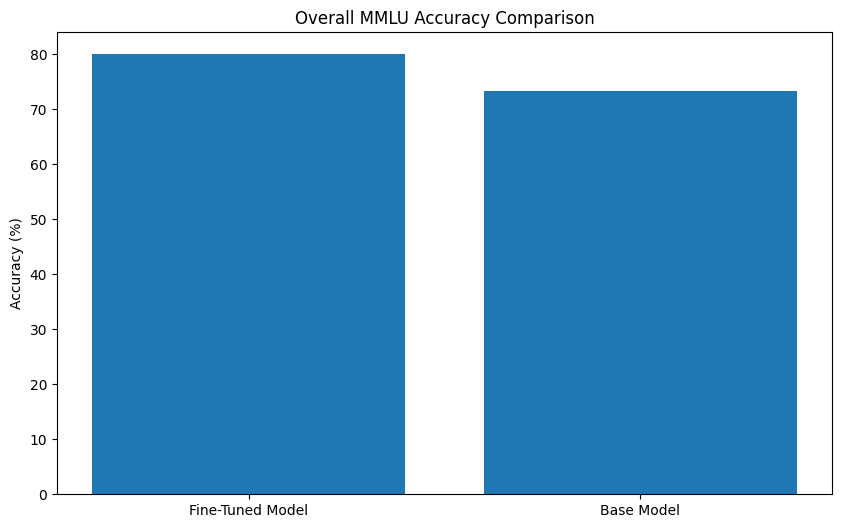

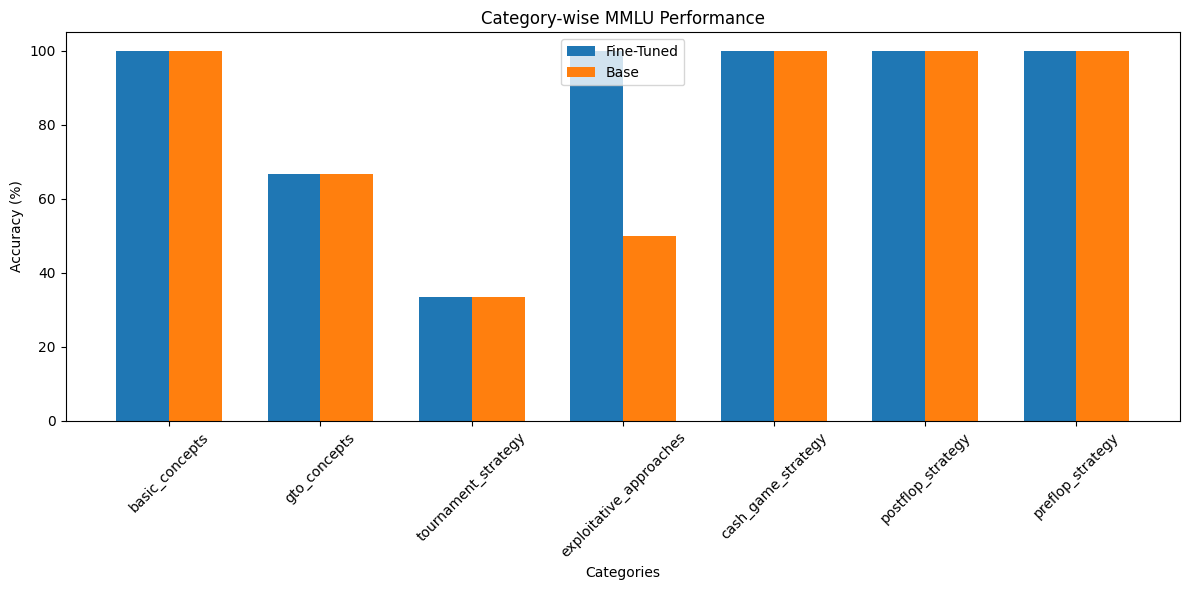

Summary results saved to: ../data/final//mmlu_summary_20241217_145128.json

Key Metrics:
Fine-tuned model accuracy: 80.00%
Base model accuracy: 73.33%
Overall improvement: 6.67%


In [34]:
analyze_mmlu_results(results)

## Human Evaluation (Benchmark: Response Relevance/Appropriateness) (20 players, in-game, post-game)

--- Average Ratings ---
In-Game Fine-Tuned: 4.26
In-Game Base: 3.54
Post-Game Fine-Tuned: 4.33
Post-Game Base: 3.50

--- Percentage Above Threshold (4+) ---
In-Game Fine-Tuned: 70.00%
In-Game Base: 30.00%
Post-Game Fine-Tuned: 80.00%
Post-Game Base: 35.00%


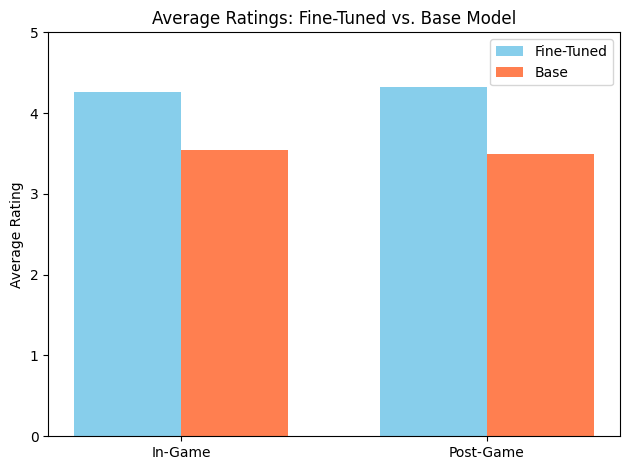

In [38]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load Data ---

# Load the original JSON data (if needed for prompts and responses)
with open("../data/final/detailed_analysis_20241216_142035.json", "r") as f:
    data = json.load(f)
detailed_responses = data["detailed_responses"]

# Load the evaluator ratings from the CSV
try:
    df_ratings = pd.read_csv("../data/raw/evaluators_ratings.csv")
except FileNotFoundError:
    print("Error: evaluators_ratings.csv not found. Please make sure the file exists and is in the correct directory.")
    exit()


# --- Analysis ---

# 1. Calculate Average Ratings

# Group by prompt_id and calculate the mean of each rating column
avg_ratings = df_ratings.groupby("prompt_id").agg({
    "in_game_rating_ft": "mean",
    "in_game_rating_base": "mean",
    "post_game_rating_ft": "mean",
    "post_game_rating_base": "mean"
})

# Calculate overall average ratings for each model
avg_ft_in_game = avg_ratings["in_game_rating_ft"].mean()
avg_base_in_game = avg_ratings["in_game_rating_base"].mean()
avg_ft_post_game = avg_ratings["post_game_rating_ft"].mean()
avg_base_post_game = avg_ratings["post_game_rating_base"].mean()

print("--- Average Ratings ---")
print(f"In-Game Fine-Tuned: {avg_ft_in_game:.2f}")
print(f"In-Game Base: {avg_base_in_game:.2f}")
print(f"Post-Game Fine-Tuned: {avg_ft_post_game:.2f}")
print(f"Post-Game Base: {avg_base_post_game:.2f}")

# 2. Calculate Percentage Above Threshold

threshold = 4

ft_in_game_above = (avg_ratings["in_game_rating_ft"] >= threshold).sum() / len(avg_ratings) * 100
base_in_game_above = (avg_ratings["in_game_rating_base"] >= threshold).sum() / len(avg_ratings) * 100
ft_post_game_above = (avg_ratings["post_game_rating_ft"] >= threshold).sum() / len(avg_ratings) * 100
base_post_game_above = (avg_ratings["post_game_rating_base"] >= threshold).sum() / len(avg_ratings) * 100

print(f"\n--- Percentage Above Threshold ({threshold}+) ---")
print(f"In-Game Fine-Tuned: {ft_in_game_above:.2f}%")
print(f"In-Game Base: {base_in_game_above:.2f}%")
print(f"Post-Game Fine-Tuned: {ft_post_game_above:.2f}%")
print(f"Post-Game Base: {base_post_game_above:.2f}%")

# --- Plotting ---

# Create a bar chart for the average ratings
labels = ['In-Game', 'Post-Game']
ft_ratings = [avg_ft_in_game, avg_ft_post_game]
base_ratings = [avg_base_in_game, avg_base_post_game]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ft_ratings, width, label='Fine-Tuned', color='skyblue')
rects2 = ax.bar(x + width/2, base_ratings, width, label='Base', color='coral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Rating')
ax.set_title('Average Ratings: Fine-Tuned vs. Base Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0, 5) # Set y-axis from 0-5

fig.tight_layout()
plt.show()

## Benchmark: GLUE/Winograd Schema Challenge (Adapted)

In [39]:
winograd_poker_schemas = [
    {
        "sentence": "The board was 9h-8h-2d-5s, and the player bet with 7h-6h, knowing that *it* was the nuts.",
        "options": ["the board", "7h-6h"],
        "answer": "7h-6h",
        "explanation": "Requires understanding of 'nuts' and how hand rankings work on specific boards."
    },
    {
        "sentence": "The player raised preflop with A-K, and the big blind called. *It* was a risky move against such a tight range.",
        "options": ["The player", "The big blind"],
        "answer": "The big blind",
        "explanation": "Requires understanding of preflop ranges and positional considerations."
    },
    {
        "sentence": "With a short stack on the bubble, the player shoved all-in with A-Q. *This* was a standard play according to ICM.",
        "options": ["short stack", "A-Q", "all-in"],
        "answer": "all-in",
        "explanation": "Tests knowledge of ICM and appropriate short-stack shoving ranges."
    },
    {
        "sentence": "The board showed K-Q-J, and the player bet, representing a strong hand like A-10 because *it* completed the straight.",
        "options": ["K-Q-J", "A-10"],
        "answer": "A-10",
        "explanation": "Requires understanding of how board texture relates to hand strength and hand representation."
    },
    {
        "sentence": "After the flop, the player in early position checked, and the player on the button bet. *It* was a good spot for a continuation bet.",
        "options": ["The player in early position", "The player on the button"],
        "answer": "The player on the button",
        "explanation": "Tests understanding of positional advantage and continuation betting principles."
    },
    {
        "sentence": "The player three-bet preflop with pocket Aces, hoping to get action from a hand like pocket Kings because *it* was unlikely to fold.",
        "options": ["pocket Aces", "pocket Kings"],
        "answer": "pocket Kings",
        "explanation": "Requires understanding of relative hand strengths and preflop betting dynamics."
    },
    {
        "sentence": "On the river, the player bet small with top pair, hoping to get called by a worse hand. *It* was a thin value bet.",
        "options": ["the player", "top pair", "a worse hand"],
        "answer": "top pair",
        "explanation": "Tests knowledge of 'thin value bet' and appropriate sizing."
    },
    {
        "sentence": "The player called the preflop raise with 7-6 suited because *it* had good implied odds in position.",
        "options": ["the preflop raise", "7-6 suited"],
        "answer": "7-6 suited",
        "explanation": "Requires understanding of implied odds and the value of suited connectors."
    },
    {
        "sentence": "The board was A-A-K-K-Q, and the player with A-Q bet, knowing *it* had a full house.",
        "options": ["the board", "A-Q"],
        "answer": "A-Q",
        "explanation": "Requires understanding of hand rankings and how they relate to board texture."
    },
    {
        "sentence": "The player limped from early position with pocket Kings, hoping to trap an aggressive player behind. *It* was a risky but potentially rewarding play.",
        "options": ["early position", "pocket Kings"],
        "answer": "pocket Kings",
        "explanation": "Tests knowledge of preflop strategy variations and the concept of trapping."
    },
    {
        "sentence": "When the turn brought a third heart, the player with the nut flush draw bet, as *it* now had a lot of equity.",
        "options": ["a third heart", "the nut flush draw"],
        "answer": "the nut flush draw",
        "explanation": "Requires understanding of drawing hands, equity, and how board changes affect hand strength."
    },
    {
        "sentence": "The player checked back the flop with top pair, hoping to induce a bluff on the turn. *This* is a form of pot control.",
        "options": ["checking back", "top pair", "a bluff"],
        "answer": "checking back",
        "explanation": "Tests understanding of advanced concepts like inducing bluffs and pot control."
    },
    {
        "sentence": "Facing a large bet on the river, the player considered calling with second pair because *it* blocked some of the opponent's value range.",
        "options": ["a large bet", "second pair"],
        "answer": "second pair",
        "explanation": "Requires understanding of the concept of blockers and how they affect hand reading."
    },
    {
        "sentence": "The player min-raised preflop from the button, trying to steal the blinds. *This* is a common tactic in late position.",
        "options": ["min-raised", "the button", "the blinds"],
        "answer": "the button",
        "explanation": "Tests knowledge of positional play and stealing blinds."
    },
    {
        "sentence": "With a stack of only 10 big blinds, the player decided to move all-in with A-9 suited because *it* was ahead of many calling ranges.",
        "options": ["10 big blinds", "A-9 suited"],
        "answer": "A-9 suited",
        "explanation": "Requires understanding of short-stack play and push/fold ranges."
    },
    {
        "sentence": "The board was dry (9-5-2 rainbow), and the player bet small with Ace-high, hoping to take it down. *It* was a good spot for a bluff.",
        "options": ["the board", "Ace-high"],
        "answer": "Ace-high",
        "explanation": "Tests understanding of bluffing on different board textures."
    },
    {
        "sentence": "The player called a bet on the flop with a gutshot straight draw, planning to bet if they hit on the turn. *This* is an example of floating.",
        "options": ["a bet", "a gutshot straight draw", "the turn"],
        "answer": "a gutshot straight draw",
        "explanation": "Requires understanding of the concept of floating and playing draws passively."
    },
    {
        "sentence": "On a paired board, the player bet with an overpair, fearing a potential full house. *It* was a necessary protection bet.",
        "options": ["a paired board", "an overpair", "a full house"],
        "answer": "an overpair",
        "explanation": "Tests understanding of hand vulnerability on different board textures."
    },
    {
        "sentence": "The player checked the river with the nuts, hoping their opponent would bluff. *It* was a risky play that paid off.",
        "options": ["the river", "the nuts", "a bluff"],
        "answer": "the nuts",
        "explanation": "Requires understanding of advanced river play and inducing bluffs."
    },
    {
        "sentence": "After facing a 3-bet preflop, the player 4-bet shoved with pocket Queens. *It* was a strong play against an aggressive opponent.",
        "options": ["a 3-bet", "pocket Queens"],
        "answer": "pocket Queens",
        "explanation": "Tests understanding of preflop 4-betting ranges and playing against aggression."
    }
]

Fine-Tuned Model Accuracy: 90.00%


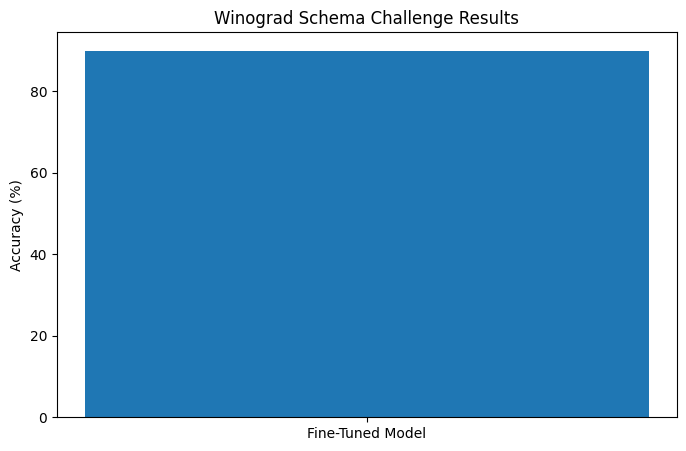

In [41]:
def evaluate_winograd_schema(
    model_id: str,
    schemas: List[Dict[str, Any]],
    client: OpenAI
) -> float:
    """Evaluate model performance on Winograd schemas."""
    correct_count = 0
    total_schemas = len(schemas)
    
    for schema in schemas:
        prompt = f"{schema['sentence']} Which word does '{schema['options'][0]}' or '{schema['options'][1]}' refer to?"
        
        try:
            response = client.chat.completions.create(
                model=model_id,
                messages=[
                    {"role": "system", "content": "You are a poker strategy advisor."},
                    {"role": "user", "content": prompt}
                ],
                temperature=0
            ).choices[0].message.content.strip()

            # Check if the answer is contained in the response
            if schema["answer"].lower() in response.lower():
                correct_count += 1
                
        except Exception as e:
            print(f"Error processing schema: {str(e)}")
            continue

    accuracy = (correct_count / total_schemas) * 100
    return accuracy

# Test fine-tuned model
try:
    ft_accuracy = evaluate_winograd_schema(
        "ft:gpt-4o-mini-2024-07-18:personal::Af1GA1or",
        winograd_poker_schemas,
        client
    )
    print(f"Fine-Tuned Model Accuracy: {ft_accuracy:.2f}%")

    # Visualize results
    plt.figure(figsize=(8, 5))
    plt.bar(['Fine-Tuned Model'], [ft_accuracy])
    plt.ylabel('Accuracy (%)')
    plt.title('Winograd Schema Challenge Results')
    plt.show()

except Exception as e:
    print(f"Error during evaluation: {str(e)}")

## Benchmark: HellaSwag (Adapted)

In [45]:
hellaswag_poker_scenarios = [
    {
        "context": "A player opens from early position, and another player calls. You are on the button holding pocket Aces. What is the most logical next action?",
        "options": ["Fold.","Call.","Raise to 2x.","Raise to 5x-6x."],
         "answer": "Raise to 5x-6x.",
        "explanation": "Pocket Aces are a very premium hand, a raise to 5x-6x will build the pot and isolate your opponents."
    },
        {
        "context": "You have a flush draw on the turn. The board is 7h-3h-2d-9h, and you're against one opponent. He bets 2/3 of the pot. What is the most logical next action?",
        "options": ["Fold immediately.","Call.", "Raise to 2/3 pot.", "Shove all in."],
        "answer": "Call.",
        "explanation": "Given the pot odds, a call is the most logical choice, but not folding, raising or all-in since you do not yet have the flush but have a draw and a call preserves your chips if you lose the river."
    },
      {
         "context": "You are short-stacked on the bubble of a tournament, and are dealt a 4-3 offsuit. The action folds to you in the small blind. What do you do?",
        "options": ["Fold.","Call.", "Raise to 3x.","Shove all in."],
          "answer": "Fold.",
         "explanation":"Given your short stack and marginal hand, it's best to fold and preserve your chips as long as possible to avoid elimination. You want to have a hand that would be worth getting into a fight for. All in is way too risky, since you have a bad hand, raise would be too much when trying to preserve your stack and limp is not a great move when on the bubble."
    },
        {
        "context": "You raised preflop with A-K and get called. The flop comes down K-J-7 rainbow, and you miss. What's the best way to play the flop?",
        "options": ["Check and give up.", "Bet 1/3 pot.", "Bet pot.", "Check-raise"],
         "answer": "Bet 1/3 pot.",
        "explanation": "You should c-bet 1/3 of the pot since the board is relatively dry and you have a strong hand, while also not risking too much of your stack. Checking is too passive and check-raising is too aggressive."
    },
       {
        "context": "You have top pair on the river, and your opponent checks. What is the best way to approach this spot?",
        "options": ["Check behind and see the cards.", "Bet 1/4 pot.", "Bet the pot.", "Fold."],
         "answer": "Bet 1/4 pot.",
        "explanation": "You should value bet a smaller size to induce calls from worse hands but avoid scaring off potential callers with too large a bet"
    },
       {
        "context": "You are heads-up on the river holding only ace high and your opponent checks. The board is A-K-5-2-3 rainbow. What is the best way to play the river?",
        "options": ["Check behind and see the cards.", "Bet 1/4 pot.", "Bet pot.", "Fold."],
        "answer": "Bet 1/4 pot.",
        "explanation":"Bet small to try to get a call from a worse hand, especially since you have ace high. Given you have Ace high and only a small pot you do not want to check back and your hand is good for a small bet but probably not more."
    },
      {
        "context": "You're facing a large river bet from a tight player. You hold second pair. What's the best action?",
        "options": ["Call since he may have a weak hand.", "Call since he may be bluffing.", "Fold to preserve your chips.", "Raise since they are showing weakness."],
        "answer": "Fold to preserve your chips.",
        "explanation": "Against a tight player who bets large on the river, it's likely they have a very strong value hand, not a bluff, so folding is the best course of action given you only have second pair"
    },
        {
        "context": "The board shows a flush draw, and you hold the nut flush draw and it's your turn to act. You're against one opponent. What do you consider?",
        "options": ["Check to try to see a card for free.", "Call if they check.", "Call a bet.", "Raise"],
        "answer": "Raise",
        "explanation":"With a nut flush draw in position, you should try to push your opponent out of the pot in case they have a draw themselves or a value hand, especially with two cards to come to hit your draw and potentially get paid more"
    },
    {
         "context": "You have a full house on the river, and your opponent checks. What's the best way to bet?",
         "options": ["Check behind to avoid scaring them off.", "Bet 1/4 pot.", "Bet the pot or more.", "Fold to protect chips"],
         "answer": "Bet the pot or more.",
         "explanation": "You should bet large to extract value from hands that are worse than yours, but might still call (e.g., a smaller full house, two pairs, or trips), checking can lose value"
    },
      {
        "context": "You are in the small blind and facing a raise from the button. You have QJs and a medium stack. What is the most reasonable decision?",
        "options": ["Fold immediately.", "Call to see the flop.", "3-bet to isolate your opponent.", "Shove to put them at risk."],
        "answer":"Call to see the flop.",
          "explanation": "Calling allows you to maintain a balanced range and see the flop with a hand that has good potential. 3-betting is not ideal since you are still a medium stack, shoving is too aggressive"
    },
       {
        "context": "You raised pre-flop with AQ and get called. The flop comes 7-5-2, all different suits. What is your move?",
        "options": ["Check behind and see what your opponent will do.", "Bet 1/3 of the pot.", "Bet pot.", "Check-raise"],
         "answer": "Bet 1/3 of the pot.",
         "explanation":"This is a relatively dry board and it is unlikely that your opponent has a hand that connects to it, a small c-bet is the ideal move. Check-raising or betting pot is too aggressive while checking is too passive"
    },
        {
        "context": "You have a decent pair on the river, but the board has a 4-flush, your opponent bets what is the ideal move?",
        "options": ["Fold and give up.", "Call to see what they have.", "Raise hoping they will fold.", "Check behind."],
        "answer": "Fold and give up.",
         "explanation":"Although you have a pair, a 4-flush on the board represents a good chance for your opponent to hit the flush. Given this, it is best to fold to protect your stack"
    },
     {
        "context": "The pot is small, and you have only a gutshot straight draw on the turn. What action has the highest expected value?",
        "options":["Fold to preserve chips.", "Call to see the river.", "Raise to make them fold.", "Bet pot hoping they will call."],
        "answer":"Call to see the river.",
         "explanation":"Calling with only a gutshot and a small pot is a good move since the pot odds will likely favor the call, raising and betting pot are too aggressive, and folding would be too passive."
    },
          {
        "context": "You are against a very passive player and you have only two over cards on the flop, what move should you make?",
         "options":["Fold and give up.", "Check and give up.", "Bet 1/4 pot.", "Bet pot and try to take it down."],
          "answer":"Bet 1/4 pot.",
        "explanation":"It is better to bet small since a passive player is likely to over fold to bets and give you a chance to build the pot later if you hit. You want to take advantage of this weakness."
    },
     {
        "context": "You have the nut flush on the river, and a player bets. What should you do?",
        "options":["Fold immediately.", "Check behind.", "Call the bet.", "Raise very large."],
        "answer":"Raise very large.",
       "explanation": "When you have the nut flush and your opponent bets, it is ideal to raise very large to get more money from your opponent and to punish them if they were bluffing."
    },
      {
        "context": "You are against a very aggressive player who bets the flop, and you only have ace high, what is the ideal move?",
         "options":["Fold to avoid losing money.", "Call to see the turn.", "Raise small to see if they fold.", "Raise all in to try to get them to fold."],
         "answer":"Fold to avoid losing money.",
          "explanation": "The most ideal move in this situation is to fold and avoid getting into a spot that you will not be able to win."
    },
    {
          "context":"The river has completed a board with a 4-card straight and you have middle set. Your opponent checks. What do you do?",
          "options": ["Check back to not lose value.", "Bet 1/4 pot for some value.", "Bet the pot to try to force a call.", "Fold to preserve chips"],
          "answer":"Bet 1/4 pot for some value.",
          "explanation":"Betting small allows you to get value from a worse hand but avoids scaring away any players who might call if you bet too large. Folding or checking would lose value, and betting pot is too aggressive"
    },
    {
        "context": "You open a hand with two high cards on the button. The big blind calls, and the flop is all low cards. What play do you make?",
        "options": ["Check behind and see what the turn brings.", "Bet 1/4 pot to test your opponent.", "Bet pot to scare off all but the best hands.", "Fold and avoid risk."],
        "answer": "Bet 1/4 pot to test your opponent.",
         "explanation":"A small c-bet is the ideal play given the board. It allows you to capitalize on the board that is unlikely to have hit your opponent, folding would be to passive, and betting pot would be to aggressive"
    },
          {
        "context":"The board shows a 4-flush, and you have a flush draw. What is your move?",
          "options":["Check behind to keep the pot small.", "Bet 1/4 of the pot for value.", "Bet pot to try to push them out.", "Fold since it is risky."],
          "answer":"Bet pot to try to push them out.",
           "explanation":"Betting large in this scenario helps you take advantage of your strong hand by potentially pushing out some players who could call. Checking or betting small could lose you value"
    },
           {
            "context": "You are playing in a tournament and have a small stack. You have only a marginal hand. What do you do?",
            "options": ["Fold immediately to not waste any chips.", "Limp to try to see the flop.", "Raise small hoping your opponent will fold.", "Shove all in for a chance to double up."],
            "answer": "Fold immediately to not waste any chips.",
            "explanation": "It is best to preserve your stack since with a short stack you don't have the luxury to play marginal hands. Shoving, raising or limping would not be the ideal play."
        }
]

Fine-Tuned Model Accuracy: 35.00%


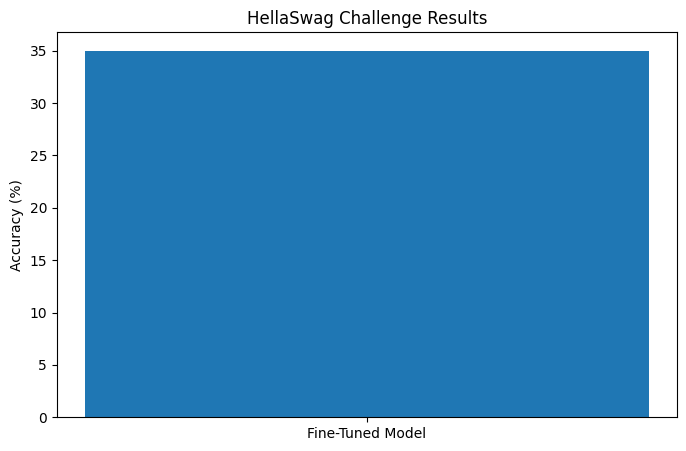

In [46]:
def evaluate_hellaswag(
    model_id: str,
    scenarios: List[Dict[str, Any]],
    client: OpenAI
) -> float:
    """Evaluate model performance on HellaSwag scenarios."""
    correct_count = 0
    total_scenarios = len(scenarios)
    
    for scenario in scenarios:
        prompt = f"{scenario['context']} What is the most logical next action? Options: {', '.join(scenario['options'])}"
        
        try:
            response = client.chat.completions.create(
                model=model_id,
                messages=[
                    {"role": "system", "content": "You are a poker strategy advisor."},
                    {"role": "user", "content": prompt}
                ],
                temperature=0
            ).choices[0].message.content.strip()

            # Check if the answer is contained in the response
            if scenario["answer"].lower() in response.lower():
                correct_count += 1
                
        except Exception as e:
            print(f"Error processing scenario: {str(e)}")
            continue

    accuracy = (correct_count / total_scenarios) * 100
    return accuracy

# Test fine-tuned model
try:
    ft_accuracy = evaluate_hellaswag(
        "ft:gpt-4o-mini-2024-07-18:personal::Af1GA1or",
        hellaswag_poker_scenarios,
        client
    )
    print(f"Fine-Tuned Model Accuracy: {ft_accuracy:.2f}%")

    # Visualize results
    plt.figure(figsize=(8, 5))
    plt.bar(['Fine-Tuned Model'], [ft_accuracy])
    plt.ylabel('Accuracy (%)')
    plt.title('HellaSwag Challenge Results')
    plt.show()

except Exception as e:
    print(f"Error during evaluation: {str(e)}")

Base Model Accuracy: 25.00%


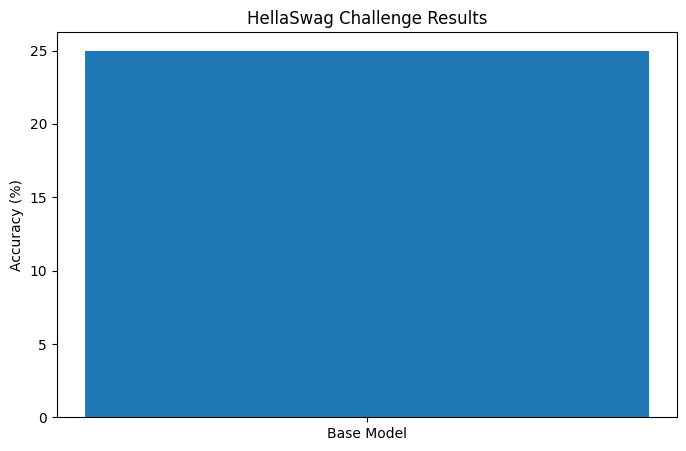

In [44]:
def evaluate_hellaswag(
    model_id: str,
    scenarios: List[Dict[str, Any]],
    client: OpenAI
) -> float:
    """Evaluate model performance on HellaSwag scenarios."""
    correct_count = 0
    total_scenarios = len(scenarios)
    
    for scenario in scenarios:
        prompt = f"{scenario['context']} What is the most logical next action? Options: {', '.join(scenario['options'])}"
        
        try:
            response = client.chat.completions.create(
                model=model_id,
                messages=[
                    {"role": "system", "content": "You are a poker strategy advisor."},
                    {"role": "user", "content": prompt}
                ],
                temperature=0
            ).choices[0].message.content.strip()

            # Check if the answer is contained in the response
            if scenario["answer"].lower() in response.lower():
                correct_count += 1
                
        except Exception as e:
            print(f"Error processing scenario: {str(e)}")
            continue

    accuracy = (correct_count / total_scenarios) * 100
    return accuracy

# Test base model
try:
    base_accuracy = evaluate_hellaswag(
        "gpt-4o-mini-2024-07-18",
        hellaswag_poker_scenarios,
        client
    )
    print(f"Base Model Accuracy: {base_accuracy:.2f}%")

    # Visualize results
    plt.figure(figsize=(8, 5))
    plt.bar(['Base Model'], [base_accuracy])
    plt.ylabel('Accuracy (%)')
    plt.title('HellaSwag Challenge Results')
    plt.show()

except Exception as e:
    print(f"Error during evaluation: {str(e)}")